<a href="https://colab.research.google.com/github/DmitryKutsev/DeepHW/blob/master/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
from math import e
from sklearn.metrics import classification_report
from sympy import diff
import torch
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision import transforms

import matplotlib.pyplot as plt

from tqdm import tqdm

from sklearn.metrics import accuracy_score

import time

In [188]:

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

In [189]:

train_dataset = MNIST('.', train=True, download=True, transform=transform)
test_dataset = MNIST('.', train=False, transform=transform)

In [190]:
train_dataset.data = train_dataset.data[(train_dataset.targets == 3) | (train_dataset.targets == 7)]
train_dataset.targets = train_dataset.targets[(train_dataset.targets == 3) | (train_dataset.targets == 7)]

test_dataset.data = test_dataset.data[(test_dataset.targets == 3) | (test_dataset.targets == 7)]
test_dataset.targets = test_dataset.targets[(test_dataset.targets == 3) | (test_dataset.targets == 7)]

train_dataset.targets = (train_dataset.targets == 7).long()
test_dataset.targets = (test_dataset.targets == 7).long()
#what is .long()?

In [191]:
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

In [192]:
# x = np.random.rand(64, 512)
# y = np.random.rand(512, 1024)

In [193]:

# res.shape == (x.shape[0], y.shape[1])

In [194]:
# x = np.random.rand(64, 512)
# y = np.random.rand(512, 1024)


# for x, y in train_loader:
#     x = x.view(x.shape[0], -1).numpy()
#     y = y.numpy()
#     break


In [215]:
# y = np.random.rand(512, 1024)
# x = np.random.rand(64, 512)

learning_rate = 0.01
epochs = 3

w1 = np.random.rand(784, 10) * learning_rate
b1 = 0 #np.zeros((128, 10))
w2 = np.random.rand(10, 1) * learning_rate
b2 = 0 #np.zeros((128, 1))

loss_func = 0

losses = []

for n_epoch in range(epochs):
    
    print(f'Epoch: {n_epoch + 1}')
    
    for x, y in train_loader:
        # print(x.shape, 'x')
        x = x.view(x.shape[0], -1).numpy()
        y = np.expand_dims(y.numpy(), 1)
        #print(x.shape)
        if x.shape[0] == 108:
          continue


        z1 = np.dot(x, w1) + b1
        print(z1.shape, 'z1')
        a1 = np.tanh(z1)
        print(a1.shape, 'a1')
        z2 = np.dot(a1, w2)+ b2
        print(z2.shape, 'z2')
        # a2 = np.tanh(z2)
        # print(a2.shape, 'a2')
                
        # forward
        

        # рассчет bce
        # не забудьте добавить это значение в массив losses
        my_y = 1/(1 + np.exp(-z2))
        print(my_y.shape, 'my_y')
        loss = -np.mean(y*np.log(my_y) + (1-y)*np.log(1-my_y))
        losses.append(loss)
          
        # backward
        print(1, 'b1')
        print(b2, 'b2')
        print(dl_db1, 'db1')
        print(dl_db2, 'db2')
        dl_dy = ((1-y)/(1-my_y) - y**2/my_y)/x.shape[0]
        print(dl_dy.shape, 'dl_dy')
        dl_dz2 = (z2 @ my_y.T @ (1-my_y))/x.shape[0]
        print(dl_dz2.shape, 'dl_dz2')
        dl_da1 = (dl_dy @ w2.T)
        print(dl_da1.shape, 'dl_da1')
        dl_dw2  =  (a1.T @ dl_dz2)/x.shape[0]
        print(dl_dw2.shape, 'dl_dw2')
        dl_dw3  =  np.mean(dl_dfunc2)
        print(dl_dw3.shape, 'dl_db2')
        dl_db2 =  np.mean(dl_dz2)/x.shape[0]

       
        dl_dz1 = (my_y @ dl_dw2.T)
        print(dl_dz1.shape, 'dl_dz1')
        print(w1.shape, 'w1')
        dl_dw1 = (x.T @ dl_dz1)/x.shape[0]
        print(dl_dw1.shape, 'dl_dw1')
        dl_db1 =  np.mean(dl_dz1)/x.shape[0]

        w1 = w1 - dl_dw1
        w2 = w2 - dl_dw2
        b1 = b1 - dl_db1
        b2 = b1 - dl_db2

        # gradient descent
        # grad_w = np.dot(x.T, grad_prev)
        # grad_x = np.dot(grad_prev, w.T)
        # grad_b = np.dot(np.ones((x.shape[0])), grad_prev)

Epoch: 1
(128, 10) z1
(128, 10) a1
(128, 1) z2
(128, 1) my_y
1 b1
0 b2
0.0 db1
0.0 db2
(128, 1) dl_dy
(128, 1) dl_dz2
(128, 10) dl_da1
(10, 1) dl_dw2
() dl_db2
(128, 10) dl_dz1
(784, 10) w1
(784, 10) dl_dw1
(128, 10) z1
(128, 10) a1
(128, 1) z2
(128, 1) my_y
1 b1
-1.0377278846994715e-08 b2
7.705065026454519e-06 db1
-7.694687747607524e-06 db2
(128, 1) dl_dy
(128, 1) dl_dz2
(128, 10) dl_da1
(10, 1) dl_dw2
() dl_db2
(128, 10) dl_dz1
(784, 10) w1
(784, 10) dl_dw1
(128, 10) z1
(128, 10) a1
(128, 1) z2
(128, 1) my_y
1 b1
3.106010700069032e-06 b2
5.2300111755310095e-06 db1
-1.604108690205456e-05 db2
(128, 1) dl_dy
(128, 1) dl_dz2
(128, 10) dl_da1
(10, 1) dl_dw2
() dl_db2
(128, 10) dl_dz1
(784, 10) w1
(784, 10) dl_dw1
(128, 10) z1
(128, 10) a1
(128, 1) z2
(128, 1) my_y
1 b1
-2.4750835846439085e-06 b2
4.596165252946658e-06 db1
-1.5056157870288276e-05 db2
(128, 1) dl_dy
(128, 1) dl_dz2
(128, 10) dl_da1
(10, 1) dl_dw2
() dl_db2
(128, 10) dl_dz1
(784, 10) w1
(784, 10) dl_dw1
(128, 10) z1
(128, 10)

In [106]:
x.shape

(128, 784)

In [162]:
(np.random.rand(10, 128) @ np.random.rand(128, 1)).shape

(10, 1)

In [211]:
losses


[0.6974101038327101,
 0.6966920292041476,
 0.6949282945970472,
 0.693648527787075,
 0.6932230971247164,
 0.6931724447698886,
 0.6931635995782939,
 0.6931357529651516,
 0.6931583117706742,
 0.6931330960800628,
 0.6931509301935976,
 0.6931881497675372,
 0.6931543947488246,
 0.6931725040849925,
 0.6931227455022195,
 0.6931709239261168,
 0.6931600624288001,
 0.6931433994008851,
 0.6931561831959091,
 0.6931299338616779,
 0.6931473121086256,
 0.6931743105858964,
 0.6931603357159828,
 0.693151128189779,
 0.6931641006478644,
 0.693147531513602,
 0.69314246094847,
 0.6931656681048453,
 0.6931531088973895,
 0.693162010998222,
 0.6931535962617701,
 0.6931595893975586,
 0.6931705833741907,
 0.6931586529841507,
 0.6931464538065566,
 0.6931411502396403,
 0.6931569840426635,
 0.6931531743364667,
 0.6931480107043366,
 0.6931365471352854,
 0.6931455773333477,
 0.6931418057446761,
 0.6931303114055165,
 0.6931420759168042,
 0.6931474809756732,
 0.6931584630895202,
 0.6931504592986468,
 0.6931263758632608

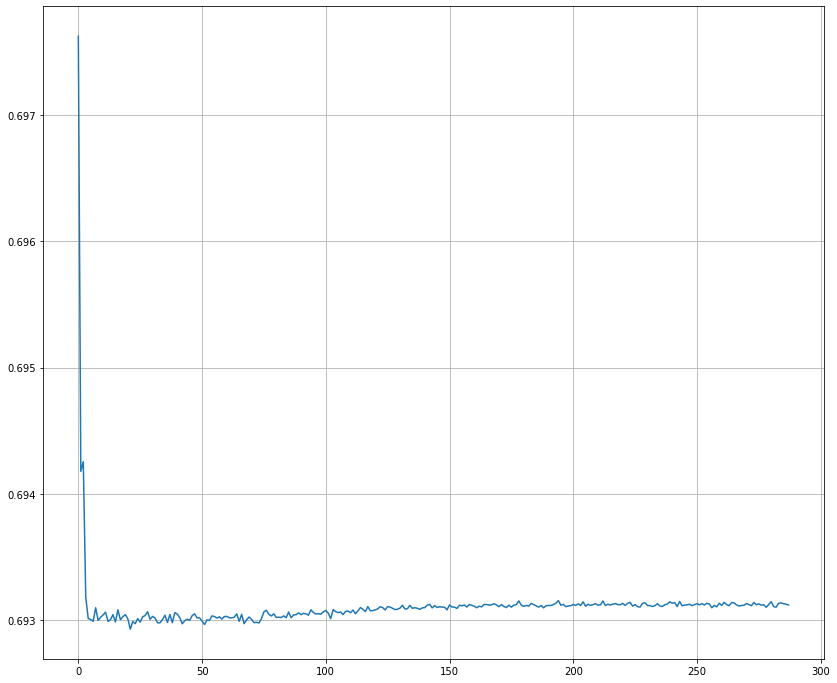

In [216]:

plt.figure(figsize=(14, 12))
plt.plot(losses)
plt.grid()